In [1]:
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd 'drive/MyDrive/GitHub/master-thesis'

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
from clustering.utils import *

In [ ]:
#%cd ..

/home/anuar/PycharmProjects/master-thesis


# Import Data

In [5]:
df, answers, info_dict = get_cluster_input_data(fa_data=True)
df.head()

,F0_cautious_behaviour,F1_perception_advice,F2_applicability_usefullness_advice,F3_consequence_advice,F4_behaviour_others,F5_no_contacts,F6_perceived_threat,gender,postnr,region,...,Q16_Other,Q16_Unsure_of_party_choice,Q16_Venstre,Vaccination_Status,Willingness_Vaccination,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers,Q7_last_week_symptom
0,7.000,5.918196,6.50,4.333333,2.5,1.00,5.0,1,4654,Zealand,...,0,0,0,NaN,NaN,0,0,2,2,0
1,6.375,5.500000,7.00,3.000000,5.5,1.25,5.0,1,7451,Central,...,0,0,0,1.0,1.0,5,0,0,0,0
2,6.250,5.000000,2.75,4.666667,3.5,6.00,6.0,0,4700,Zealand,...,1,0,0,NaN,NaN,4,1,4,15,0
3,5.250,1.500000,1.25,1.666667,5.0,1.25,3.5,0,4000,Zealand,...,0,1,0,NaN,NaN,4,0,0,1,0
4,7.000,6.833333,5.50,4.666667,6.0,0.00,4.0,0,8543,Central,...,0,0,0,NaN,NaN,0,0,0,0,1


In [7]:
info_dict

{'cluster_input_cols': ['F0_cautious_behaviour',
  'F1_perception_advice',
  'F2_applicability_usefullness_advice',
  'F3_consequence_advice',
  'F4_behaviour_others',
  'F5_no_contacts',
  'F6_perceived_threat'],
 'combined_data': False,
 'data_path': 'data/preprocessing/dim_reduction/220503_fa_data.csv',
 'fa_data': True,
 'pca_data': False,
 'scaler_type': 'MinMaxScaler()'}

In [8]:
behaviour_cols = get_factor_cols()
behaviour_cols

['F0_cautious_behaviour',
 'F1_perception_advice',
 'F2_applicability_usefullness_advice',
 'F3_consequence_advice',
 'F4_behaviour_others',
 'F5_no_contacts',
 'F6_perceived_threat']

# K-means clustering

## Elbow approach to determine ideal amount of clusters

In [9]:
distortions = []
distortions_k = []
K = range(1,9)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(answers)
    distortions.append(kmeanModel.inertia_)
    distortions_k.append(kmeanModel.inertia_/k)


100%|██████████| 8/8 [00:27<00:00,  3.50s/it]


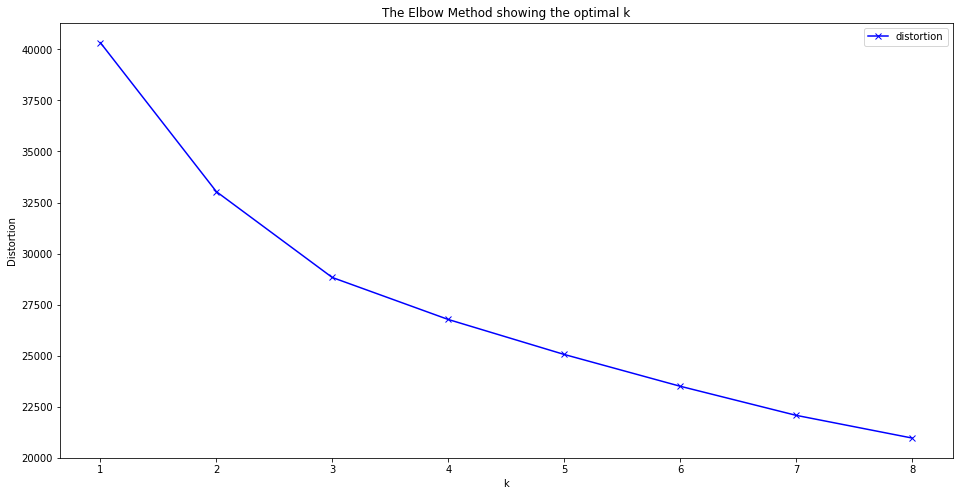

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', label='distortion')
#plt.plot(K, distortions_k, 'rx-', label='distortion/K')
plt.legend()
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## K-means fit

In [58]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(answers)

In [59]:
df['group']=kmeans.labels_

In [60]:
df.head()

,F0_cautious_behaviour,F1_perception_advice,F2_applicability_usefullness_advice,F3_consequence_advice,F4_behaviour_others,F5_no_contacts,F6_perceived_threat,gender,postnr,region,...,Q16_Unsure_of_party_choice,Q16_Venstre,Vaccination_Status,Willingness_Vaccination,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers,Q7_last_week_symptom,group
0,7.000,5.918196,6.50,4.333333,2.5,1.00,5.0,1,4654,Zealand,...,0,0,NaN,NaN,0,0,2,2,0,1
1,6.375,5.500000,7.00,3.000000,5.5,1.25,5.0,1,7451,Central,...,0,0,1.0,1.0,5,0,0,0,0,1
2,6.250,5.000000,2.75,4.666667,3.5,6.00,6.0,0,4700,Zealand,...,0,0,NaN,NaN,4,1,4,15,0,0
3,5.250,1.500000,1.25,1.666667,5.0,1.25,3.5,0,4000,Zealand,...,1,0,NaN,NaN,4,0,0,1,0,0
4,7.000,6.833333,5.50,4.666667,6.0,0.00,4.0,0,8543,Central,...,0,0,NaN,NaN,0,0,0,0,1,1


In [61]:
from sklearn import metrics

df_sample = df.sample(20000) # used only for quick results, must be changed back to only df to get real score

X = df_sample[behaviour_cols].to_numpy()
labels = df_sample.group.to_numpy()
metrics.silhouette_score(X, labels, metric='euclidean')

0.171661160991177

K-Means Silhouette Scores:
- 2 Cluster: 0.17
- 3 Cluster: 0.12
- 4 Cluster: 0.11
- 5 Cluster: 0.09
- 7 Cluster: 0.12

# Saving Data

In [ ]:
df.to_csv("data/clustering/220415_k_means_grouped_data.csv",index=False)